# Read SED fitting results

In [1]:
%matplotlib widget
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

import uncertainties.umath as uum
from uncertainties import ufloat
from uncertainties import unumpy

homedir = '/Users/javieratoro/Desktop/proyecto 2024-2/'

res_mage_con = fits.open(homedir +'sed_fitting/mage/SFH_const/results.fits')
res_ceci_con = fits.open(homedir + 'sed_fitting/cecilia/SFH_const/results.fits')
res_mage_del = fits.open(homedir + 'sed_fitting/mage/SFH_del/results.fits')
res_ceci_del = fits.open(homedir + 'sed_fitting/cecilia/SFH_del/results.fits')

mpa_jhu = fits.open(homedir + 'MPA-JHU/galSpecExtra-dr8.fits')
info_mpa = fits.open(homedir + 'MPA-JHU/galSpecInfo-dr8.fits')

import os
os.getcwd()

from astropy.table import Table

In [2]:
# Zoom effect
from matplotlib.transforms import (Bbox, TransformedBbox,
                                   blended_transform_factory)
from mpl_toolkits.axes_grid1.inset_locator import (BboxConnector,
                                                   BboxConnectorPatch,
                                                   BboxPatch)


def connect_bbox(bbox1, bbox2,
                 loc1a, loc2a, loc1b, loc2b,
                 prop_lines, prop_patches=None):
    if prop_patches is None:
        prop_patches = {
            **prop_lines,
            "alpha": prop_lines.get("alpha", 1) * 0.2,
            "clip_on": False,
        }

    c1 = BboxConnector(
        bbox1, bbox2, loc1=loc1a, loc2=loc2a, clip_on=False, **prop_lines)
    c2 = BboxConnector(
        bbox1, bbox2, loc1=loc1b, loc2=loc2b, clip_on=False, **prop_lines)

    bbox_patch1 = BboxPatch(bbox1, **prop_patches)
    bbox_patch2 = BboxPatch(bbox2, **prop_patches)

    p = BboxConnectorPatch(bbox1, bbox2,
                           loc1a=loc1a, loc2a=loc2a, loc1b=loc1b, loc2b=loc2b,
                           clip_on=False,
                           **prop_patches)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect01(ax1, ax2, xmin, xmax, **kwargs):
    """
    Connect *ax1* and *ax2*. The *xmin*-to-*xmax* range in both axes will
    be marked.

    Parameters
    ----------
    ax1
        The main axes.
    ax2
        The zoomed axes.
    xmin, xmax
        The limits of the colored area in both plot axes.
    **kwargs
        Arguments passed to the patch constructor.
    """

    bbox = Bbox.from_extents(xmin, 0, xmax, 1)

    mybbox1 = TransformedBbox(bbox, ax1.get_xaxis_transform())
    mybbox2 = TransformedBbox(bbox, ax2.get_xaxis_transform())

    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1, mybbox2,
        loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p


def zoom_effect02(ax1, ax2, **kwargs):
    """
    ax1 : the main axes
    ax1 : the zoomed axes

    Similar to zoom_effect01.  The xmin & xmax will be taken from the
    ax1.viewLim.
    """

    tt = ax1.transScale + (ax1.transLimits + ax2.transAxes)
    trans = blended_transform_factory(ax2.transData, tt)

    mybbox1 = ax1.bbox
    mybbox2 = TransformedBbox(ax1.viewLim, trans)

    prop_patches = {**kwargs, "ec": "none", "alpha": 0.2}

    c1, c2, bbox_patch1, bbox_patch2, p = connect_bbox(
        mybbox1, mybbox2,
        loc1a=3, loc2a=2, loc1b=4, loc2b=1,
        prop_lines=kwargs, prop_patches=prop_patches)

    ax1.add_patch(bbox_patch1)
    ax2.add_patch(bbox_patch2)
    ax2.add_patch(c1)
    ax2.add_patch(c2)
    ax2.add_patch(p)

    return c1, c2, bbox_patch1, bbox_patch2, p

# Comparing fits

In [3]:
texPlot('on')

fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 8)
fig.subplots_adjust(hspace=0.4)

# Stellar Mass
bin_mstar = np.arange(6.5, 10.0, 0.5)
axs[0, 0].grid(True, zorder=0)
axs[0, 0].hist([np.log10(results_old[1].data['bayes.stellar.m_star']),
          np.log10(results_age[1].data['bayes.stellar.m_star']),
          np.log10(results_noage[1].data['bayes.stellar.m_star'])], bins=bin_mstar,
        histtype='barstacked', lw =2, edgecolor='black', color=(c[0], c[1], c[2]), zorder=5,
           label=('Late burst (Model 3)', 'Constant SFH ($<$ 1 Gyr; Model 2)', 'Constant SFH (Model 1)'))
axs[0, 0].set_xlabel(r'log(M$^{*}$/M$_{\odot}$)')
axs[0, 0].set_ylabel('Number of sources')

axs[0, 0].set_title(np.round(np.median(np.log10(results_old[1].data['bayes.stellar.m_star'])), 2),
                 color=c[0], zorder=10, fontsize=15, loc='Left')
axs[0, 0].set_title(np.round(np.median(np.log10(results_age[1].data['bayes.stellar.m_star'])), 2),
                 color=c[1], zorder=10, fontsize=15)
axs[0, 0].set_title(np.round(np.median(np.log10(results_noage[1].data['bayes.stellar.m_star'])), 2),
                 color=c[2], zorder=10, fontsize=15, loc='Right')


# SFR 
bin_sfr = np.arange(-2.0, 2.5, 0.5)
axs[0, 1].grid(True, zorder=0)
axs[0, 1].hist([np.log10(results_old[1].data['bayes.sfh.sfr']),
                np.log10(results_age[1].data['bayes.sfh.sfr']),
                np.log10(results_noage[1].data['bayes.sfh.sfr'])], bins=bin_sfr,
        histtype='barstacked', lw =2, edgecolor='black', color=(c[0], c[1], c[2]), zorder=5)
axs[0, 1].set_xlabel(r'log SFR (M$_{\odot}$/yr)')

axs[0,  1].set_title(np.round(np.median(np.log10(results_old[1].data['bayes.sfh.sfr'])), 2),
                   color=c[0], zorder=10, fontsize=15, loc='Left')
axs[0,  1].set_title(np.round(np.median(np.log10(results_age[1].data['bayes.sfh.sfr'])), 2), 
                   color=c[1], zorder=10, fontsize=15)
axs[0,  1].set_title(np.round(np.median(np.log10(results_noage[1].data['bayes.sfh.sfr'])), 2), 
                   color=c[2], zorder=10, fontsize=15, loc='Right')

# Av
bin_av = np.arange(0.0, 1.1, 0.1)
axs[1, 0].grid(True, zorder=0)
axs[1, 0].hist([3.1 * results_old[1].data['bayes.attenuation.E_BVs'] / 0.44,
                3.1 * results_age[1].data['bayes.attenuation.E_BVs'] / 0.44,
                3.1 * results_noage[1].data['bayes.attenuation.E_BVs'] / 0.44], bins=bin_av,
        histtype='barstacked', lw =2, edgecolor='black', color=(c[0], c[1], c[2]), zorder=5)
axs[1, 0].set_xlabel(r'A$_{V}$ (mag)')
axs[1, 0].set_ylabel('Number of sources')

axs[1, 0].set_title(np.round(np.median(3.1 * results_old[1].data['bayes.attenuation.E_BVs'] / 0.44), 2),
              color=c[0], zorder=10, fontsize=15, loc='Left')
axs[1, 0].set_title(np.round(np.median(3.1 * results_age[1].data['bayes.attenuation.E_BVs'] / 0.44), 2),
              color=c[1], zorder=10, fontsize=15)
axs[1, 0].set_title(np.round(np.median(3.1 * results_noage[1].data['bayes.attenuation.E_BVs'] / 0.44), 2),
              color=c[2], zorder=10, fontsize=15, loc='Right')


# Electron density
bin_ne = np.arange(300, 750, 50)
axs[1, 1].grid(True, zorder=0)
axs[1, 1].hist([results_old[1].data['bayes.nebular.ne'],
                results_age[1].data['bayes.nebular.ne'],
                results_noage[1].data['bayes.nebular.ne']], bins=bin_ne,
        histtype='barstacked', lw =2, edgecolor='black', color=(c[0], c[1], c[2]), zorder=5)
axs[1, 1].set_xlabel(r'$n_{e}$ (cm$^{-3}$)')

axs[1, 1].set_title(np.round(np.median(results_old[1].data['bayes.nebular.ne']), 2), 
               color=c[0], zorder=10, fontsize=15, loc='Left')
axs[1, 1].set_title(np.round(np.median(results_age[1].data['bayes.nebular.ne']), 2), 
               color=c[1], zorder=10, fontsize=15)
axs[1, 1].set_title(np.round(np.median(results_noage[1].data['bayes.nebular.ne']), 2), 
               color=c[2], zorder=10, fontsize=15, loc='Right')

# Age
bin_age = np.arange(0, 10, 1)
axs[0, 2].grid(True, zorder=0)
axs[0, 2].hist([results_old[1].data['bayes.sfh.age']/1000,
                results_age[1].data['bayes.sfh.age']/1000,
                results_noage[1].data['bayes.sfh.age']/1000],
        histtype='barstacked', lw =2, edgecolor='black', color=(c[0], c[1], c[2]), zorder=5)
axs[0, 2].set_xlabel(r'Age (Gyr)')

axs[0, 2].set_title(np.round(np.median(results_old[1].data['bayes.sfh.age']/1000), 2),
               color=c[0], zorder=10, fontsize=15, loc='Left')
axs[0, 2].set_title(np.round(np.median(results_age[1].data['bayes.sfh.age']/1000), 2),
               color=c[1], zorder=10, fontsize=15)
axs[0, 2].set_title(np.round(np.median(results_noage[1].data['bayes.sfh.age']/1000), 2),
               color=c[2], zorder=10, fontsize=15, loc='Right')

# Off axis
axs[1, 2].axis('off')
axs[0, 0].legend(loc=(2.3, -1.2), fontsize=20)

fig.savefig('/home/benjamin/Documents/analogs/imges/sed_fitting/sed_results.pdf',
           bbox_inches='tight')

NameError: name 'texPlot' is not defined

 ---- 

# Table of results

In [3]:
def params(fits, name):
    m_star = unumpy.log10(unumpy.uarray(fits[1].data['bayes.stellar.m_star'], fits[1].data['bayes.stellar.m_star_err']))
    sfr = unumpy.log10(unumpy.uarray(fits[1].data['bayes.sfh.sfr'], fits[1].data['bayes.sfh.sfr_err']))
    age = unumpy.uarray(fits[1].data['bayes.sfh.age']/1000, fits[1].data['bayes.sfh.age_err']/1000)
    Av = 3.1 * unumpy.uarray(fits[1].data['bayes.attenuation.E_BVs'], fits[1].data['bayes.attenuation.E_BVs_err']) / 0.44
    ne = unumpy.uarray(fits[1].data['bayes.nebular.ne'], fits[1].data['bayes.nebular.ne_err'])
    logU = fits[1].data['best.nebular.logU']
    red_chi2 = np.array(fits[1].data['best.reduced_chi_square'])

    ra_order = np.argsort(fits[1].data['id'])

    dict_sed_results = {'ID': fits[1].data['id'][ra_order],
                        'Age': age[ra_order],
                        'logM': m_star[ra_order],
                        'logSFR': sfr[ra_order],
                        'Av': Av[ra_order],
                        'ne': ne[ra_order],
                        'red_chi2': red_chi2[ra_order]
    }

    dict_sed_results_pd = pd.DataFrame(data=dict_sed_results)

    pd.set_option('display.float_format', lambda x: '%.3f' % x)
    # dict_sed_results_pd.to_latex(index=False, float_format='{:.0f}'.format, escape=False)
    dict_sed_results_pd.to_csv(homedir + f'CSV_files/{name}.csv')


def get_limits(*arrays):
    return np.min([np.min(arr) for arr in arrays]), np.max([np.max(arr) for arr in arrays])



def plots(results_mage, results_ceci, title, bins, fburst=False):

    fig, axs = plt.subplots(3, 3, figsize=(9,8), tight_layout=True)

    data_mage = results_mage[1].data
    data_cecilia = results_ceci[1].data

    #plt.subplots_adjust(wspace=0.2, hspace=0.4)
    plt.suptitle(title, y=0.99, fontsize=16)


    min, max  = get_limits(data_mage['bayes.sfh.age']/1000, data_cecilia['bayes.sfh.age']/1000)
    axs[0, 0].hist(data_mage['bayes.sfh.age']/1000, bins=np.arange(min, max*1.1, bins[0]),
            edgecolor='black', alpha=0.4, facecolor='deeppink', label='MagE')
    axs[0, 0].hist(data_cecilia['bayes.sfh.age']/1000, bins=np.arange(min, max*1.1, bins[0]),
            edgecolor='black', alpha=0.4, facecolor='teal', label='KBSS')
    axs[0, 0].set_xlabel('Age [Gyr]')
    axs[0, 0].legend(fontsize='small')


    min, max = get_limits(data_mage['bayes.nebular.ne'], data_cecilia['bayes.nebular.ne'])
    axs[0, 1].hist(data_mage['bayes.nebular.ne'], bins=np.arange(min, max*1.1, bins[1]),
            edgecolor='black', facecolor='deeppink', alpha=0.4)
    axs[0, 1].hist(data_cecilia['bayes.nebular.ne'], bins=np.arange(min, max*1.1, bins[1]),
            edgecolor='black', facecolor='teal', alpha=0.4)
    axs[0, 1].set_xlabel(r'$n_{e}$ [cm$^{-3}$]')


    min, max = get_limits(np.log10(data_mage['bayes.stellar.m_star']),
                          np.log10(data_cecilia['bayes.stellar.m_star']))
    axs[0, 2].hist(np.log10(data_cecilia['bayes.stellar.m_star']), bins=np.arange(min, max*1.1, bins[2]),
                edgecolor='black', facecolor='teal', alpha=0.4)
    axs[0, 2].hist(np.log10(data_mage['bayes.stellar.m_star']),bins=np.arange(min, max*1.1, bins[2]),
                edgecolor='black', facecolor='deeppink', alpha=0.4)
    axs[0, 2].axvline(np.median(np.log10(data_mage['bayes.stellar.m_star'])), ls='--', lw=4,
                      label='Median MagE', color='red')
    axs[0, 2].axvline(np.median(np.log10(data_cecilia['bayes.stellar.m_star'])), ls='--', lw=4,
                      label='Median KBSS', color='blue')
    axs[0, 2].axvline(8.9542, ls='--', lw=4, color='purple', label='Median Bian+2016')
    axs[0, 2].legend(fontsize='small')
    axs[0, 2].set_xlabel(r'log(M / M$_{\odot}$)')

    min, max = get_limits(data_mage['bayes.sfh.sfr100Myrs'], data_cecilia['bayes.sfh.sfr100Myrs'])
    axs[1, 0].hist(data_cecilia['bayes.sfh.sfr100Myrs'], bins=np.arange(min, max*1.1, bins[3]),
            edgecolor='black', facecolor='teal', alpha=0.4)
    axs[1, 0].hist(data_mage['bayes.sfh.sfr100Myrs'], bins=np.arange(min, max*1.1, bins[3]),
            edgecolor='black', facecolor='deeppink', alpha=0.4)
    axs[1, 0].set_xlabel(r'SFR (M$_{\odot}$/yr)')

    min, max = get_limits(3.1 * data_mage['bayes.attenuation.E_BVs'], 
                          3.1 * data_mage['bayes.attenuation.E_BVs'])
    axs[1, 1].hist(3.1 * data_mage['bayes.attenuation.E_BVs'], bins=np.arange(min, max*1.1, 0.1),
                edgecolor='black', facecolor='deeppink', alpha=0.4)
    axs[1, 1].hist(3.1 * data_cecilia['bayes.attenuation.E_BVs'], bins=np.arange(min, max*1.1, 0.1),
                edgecolor='black', facecolor='teal',alpha=0.4)
    axs[1, 1].set_xlabel(r'$A_{V}$')

    min, max = get_limits(data_mage['best.reduced_chi_square'], data_cecilia['best.reduced_chi_square'])
    axs[1, 2].hist(data_mage['best.reduced_chi_square'],
                edgecolor='black', facecolor='deeppink', alpha=0.4,
                  bins=np.arange(min, max*1.1, bins[4])
                  )
    axs[1, 2].hist(data_cecilia['best.reduced_chi_square'],
                edgecolor='black', facecolor='teal', alpha=0.4,
                bins=np.arange(min, max*1.1, bins[4])
                )
    axs[1, 2].set_xlabel(r'$\chi^{2}_{\nu}$')

    if fburst is True:
        min, max = get_limits(data_mage['bayes.sfh.f_burst'], data_cecilia['bayes.sfh.f_burst'])
        axs[2, 2].hist(data_cecilia['bayes.sfh.f_burst'], bins=np.arange(min, max*1.1, 0.05),
                    edgecolor='black', facecolor='teal', alpha=0.4)
        axs[2, 2].hist(data_mage['bayes.sfh.f_burst'], bins=np.arange(min, max*1.1, 0.05),
                    edgecolor='black', facecolor='deeppink', alpha=0.4)
        axs[2, 2].set_xlabel(r'f$_{burst}$')

        min, max = get_limits(data_mage['bayes.sfh.f_burst'] * data_mage['bayes.sfh.age']/1000,
                              data_cecilia['bayes.sfh.f_burst'] * data_cecilia['bayes.sfh.age']/1000)
        axs[2, 1].hist(data_mage['bayes.sfh.f_burst'] * data_mage['bayes.sfh.age']/1000,
                       bins=np.arange(min, max*1.1, bins[6]),
                    edgecolor='black', facecolor='deeppink', alpha=0.4)
        axs[2, 1].hist(data_cecilia['bayes.sfh.f_burst'] * data_cecilia['bayes.sfh.age']/1000,
                       bins=np.arange(min, max*1.1, bins[6]),
                    edgecolor='black', facecolor='teal', alpha=0.4)
        axs[2, 1].set_xlabel(r'f$_{burst}$ $\times$ Age (Gyr)')

    else:
        axs[2, 1].remove()
        axs[2, 2].remove()

    min, max = get_limits(data_mage['best.stellar.m_star_young'] *
                          (data_mage['bayes.sfh.age']/1000) / data_mage['bayes.stellar.m_star'],
                          data_cecilia['best.stellar.m_star_young'] *
                          (data_cecilia['bayes.sfh.age']/1000) / data_cecilia['bayes.stellar.m_star'])
    
    axs[2, 0].hist(data_cecilia['best.stellar.m_star_young'] *
                   (data_cecilia['bayes.sfh.age']/1000) /
                   data_cecilia['bayes.stellar.m_star'],
                edgecolor='black', facecolor='teal', alpha=0.4,
                bins=np.arange(min, max*1.1, bins[5])
                )
    axs[2, 0].hist(data_mage['best.stellar.m_star_young'] *
                   (data_mage['bayes.sfh.age']/1000) /
                   data_mage['bayes.stellar.m_star'],
                edgecolor='black', facecolor='deeppink', alpha=0.4,
                bins=np.arange(min, max*1.1, bins[5]))
    axs[2, 0].set_xlabel(r'best($M_{young}$) $\times$ Age / best($M_{tot}$)')
    plt.tight_layout()
    plt.show()

def mass(results):
        specobjID = {'J2225': 422244936562272256,
             'J2215': 1243134008619984896,
             'J0240': 513494502204270592,
             'J0021': 439223316213950464,
             'J0950': 300731025703593984,
             'J1146': 318786936665827328,
             'J1226': 3242617920756410368,
             'J1444': 661039343871223808,
             'J1448': 346799464301750272,
             'J2101': 717307953417316352,
             'J2119': 1111371552277948416,
             'J0023': 735339668748396544,
             'J0136': 1691125637219117056,
             'J0252': 797248221209454592,
             'J0305': 798423599642863616,
             'J2212': 1243114217410684928,
             'J2337': 767911057829160960,
             'J1624': 409879001813772288 }
        mpa_jhu_m = []
        mpa_jhu_m16 = []
        mpa_jhu_m84 = []
        masks = []
        for ID in results[1].data['id'][:17]:

        # What I have to do when a companion is in the data...
                galid = ''
                try:
                        galid = ID[0:5] + ID[10:]
                except:
                        galid = ID[0:5]

                objID = specobjID[galid]
                mask = (mpa_jhu[1].data['SPECOBJID'] == str(objID))
                m_star = mpa_jhu[1].data['LGM_TOT_P50'][mask]
                m_star16 = mpa_jhu[1].data['LGM_TOT_P16'][mask]
                m_star84 = mpa_jhu[1].data['LGM_TOT_P84'][mask]
                masks.append(mask)

                mpa_jhu_m.append(m_star[0] + np.log10(0.61/0.66))
                mpa_jhu_m16.append(m_star16[0]+ np.log10(0.61/0.66))
                mpa_jhu_m84.append(m_star84[0]+ np.log10(0.61/0.66))
        
        mpa_jhu_m = np.array(mpa_jhu_m)
        mpa_jhu_m16 = np.array(mpa_jhu_m16)
        mpa_jhu_m84 = np.array(mpa_jhu_m84)

        asymmetric_error = np.array(list(zip(mpa_jhu_m - mpa_jhu_m16,
                                             mpa_jhu_m84 - mpa_jhu_m))).T

        unc_m_star = unumpy.uarray(results[1].data['bayes.stellar.m_star'][:17], results[1].data['bayes.stellar.m_star_err'][:17])
        m_star = unumpy.nominal_values(unumpy.log10(unc_m_star))
        m_star_err = unumpy.std_devs(unumpy.log10(unc_m_star))

        return m_star, m_star_err, asymmetric_error, mpa_jhu_m

def mass_plot(results, title):
        m_star, m_star_err, asymmetric_error, mpa_jhu_m = mass(results[0])
        m_star1, m_star_err1, asymmetric_error1, mpa_jhu_m1 = mass(results[1])        

        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        axes[0].errorbar(m_star, mpa_jhu_m, xerr=m_star_err, yerr=asymmetric_error,
                        fmt='o', capsize=5, color='orangered', ecolor='gray')
        axes[0].plot([7, 10.5], [7, 10.5], color='black')
        axes[0].set_ylabel(r'log(M / M$_{\odot}$) (MPA-JHU)')
        axes[0].set_xlabel(r'log(M / M$_{\odot}$) (CIGALE)')
        axes[0].set_title(title[0])

        axes[1].errorbar(m_star1, mpa_jhu_m1, xerr=m_star_err1, yerr=asymmetric_error1,
                         fmt='o', capsize=5, color='orangered', ecolor='gray')
        axes[1].plot([7, 10.5], [7, 10.5], color='black')
        axes[1].set_xlabel(r'log(M / M$_{\odot}$) (CIGALE)')
        axes[1].set_title(title[1])


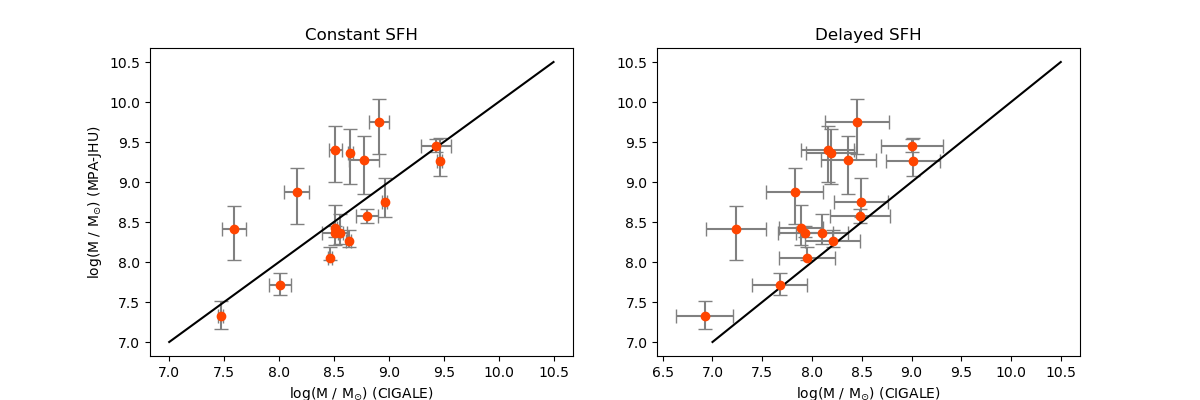

In [4]:
mass_plot([res_mage_con, res_mage_del], title=['Constant SFH', 'Delayed SFH'])

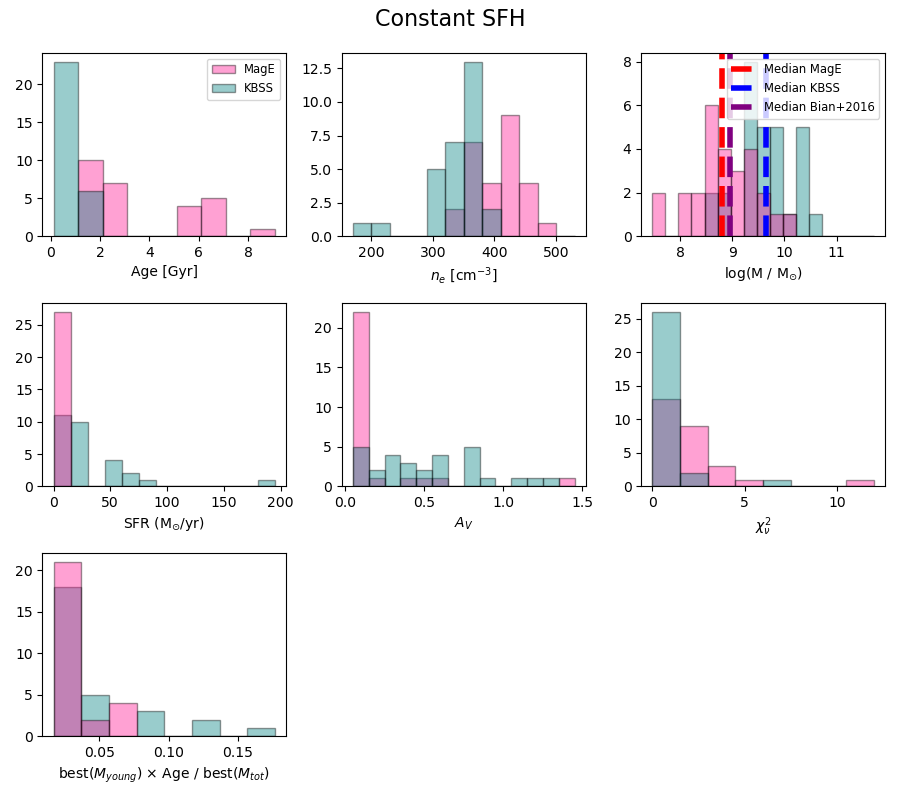

In [5]:
plots(results_ceci=res_ceci_con, results_mage=res_mage_con, fburst=False,
      title='Constant SFH', bins=[1, 30, 0.25, 15, 1.5, 0.02, 0.5])

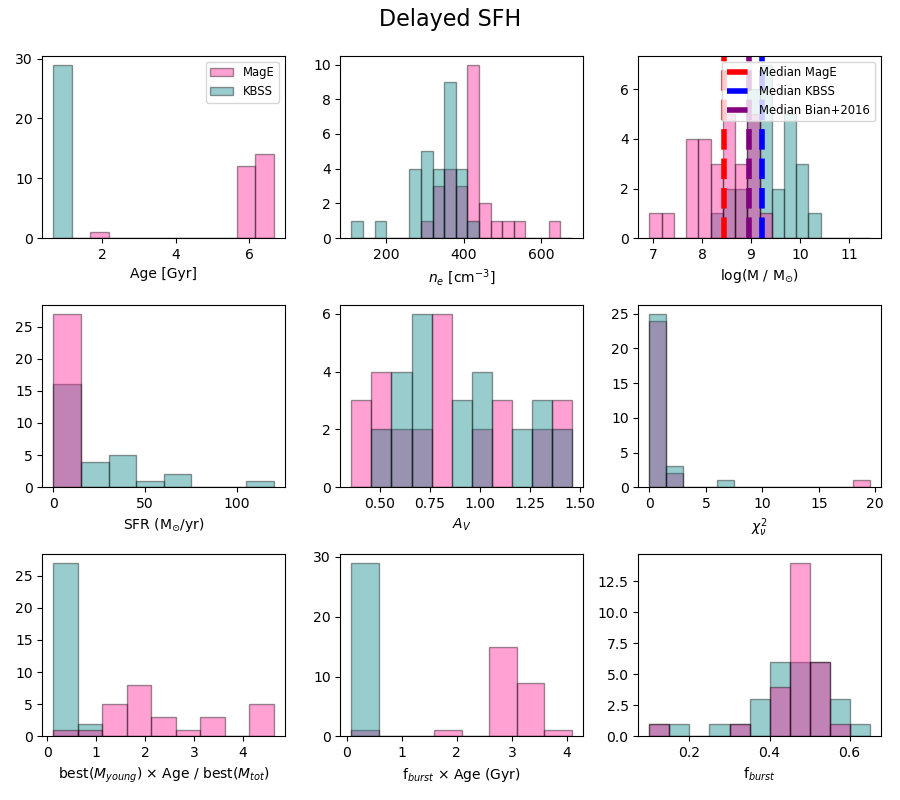

In [6]:
plots(results_ceci=res_ceci_del, results_mage=res_mage_del, fburst=True,
      title='Delayed SFH', bins=[0.5, 30, 0.25, 15, 1.5, 0.5, 0.5])

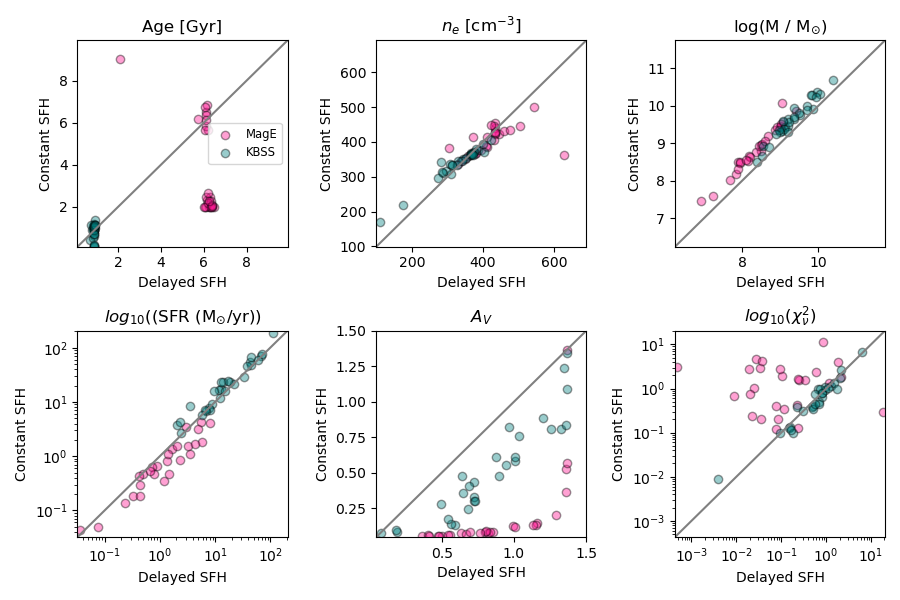

In [7]:
import matplotlib.pyplot as plt
import numpy as np


def scatter_plot(ax, x_data, y_data, x_data2, y_data2, title, log_scale=False):

    min_, max_ = get_limits(x_data, y_data, x_data2, y_data2)
    lims = [min_*0.9, max_ * 1.1]

    ax.plot(lims, lims, color='grey')

    ax.scatter(x_data, y_data, marker='o', color='deeppink', alpha=0.4, edgecolor='k', label='MagE')
    ax.scatter(x_data2, y_data2, marker='o', color='teal', alpha=0.4, edgecolor='k', label='KBSS')

    ax.set_xlabel('Delayed SFH')
    ax.set_ylabel('Constant SFH')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    if log_scale:
        ax.set_title(r'$log_{10}$(' + title + ')')
        ax.set_xscale('log')
        ax.set_yscale('log')
    else:
        ax.set_title(title)

    if ax == axs[0,0]:
        ax.legend(fontsize='small')


data_mage = res_mage_del[1].data
data_cecilia = res_ceci_del[1].data
data_mage_c = res_mage_con[1].data
data_cecilia_c = res_ceci_con[1].data

# Crear figura y ejes
fig, axs = plt.subplots(2, 3, figsize=(9, 6), tight_layout=True)

# Llamadas a la función para cada gráfico
scatter_plot(axs[0, 0], data_mage['bayes.sfh.age']/1000, data_mage_c['bayes.sfh.age']/1000,
             data_cecilia['bayes.sfh.age']/1000, data_cecilia_c['bayes.sfh.age']/1000,
             'Age [Gyr]')

scatter_plot(axs[0, 1], data_mage['bayes.nebular.ne'], data_mage_c['bayes.nebular.ne'],
             data_cecilia['bayes.nebular.ne'], data_cecilia_c['bayes.nebular.ne'],
             r'$n_{e}$ [cm$^{-3}$]')

scatter_plot(axs[0, 2], np.log10(data_mage['bayes.stellar.m_star']), np.log10(data_mage_c['bayes.stellar.m_star']),
             np.log10(data_cecilia['bayes.stellar.m_star']), np.log10(data_cecilia_c['bayes.stellar.m_star']),
             r'log(M / M$_{\odot}$)')

scatter_plot(axs[1, 0], data_mage['bayes.sfh.sfr100Myrs'], data_mage_c['bayes.sfh.sfr100Myrs'],
             data_cecilia['bayes.sfh.sfr100Myrs'], data_cecilia_c['bayes.sfh.sfr100Myrs'],
             r'(SFR (M$_{\odot}$/yr)', log_scale=True)

scatter_plot(axs[1, 1], 3.1 * data_mage['bayes.attenuation.E_BVs'], 3.1 * data_mage_c['bayes.attenuation.E_BVs'],
             3.1* data_cecilia['bayes.attenuation.E_BVs'], 3.1* data_cecilia_c['bayes.attenuation.E_BVs'],
             r'$A_{V}$')

scatter_plot(axs[1, 2], data_mage['best.reduced_chi_square'], data_mage_c['best.reduced_chi_square'],
             data_cecilia['best.reduced_chi_square'], data_cecilia_c['best.reduced_chi_square'],
             r'$\chi^{2}_{\nu}$', log_scale=True)

# scatter_plot(axs[2, 0], data_mage['best.stellar.m_star_young'] *
#                 (data_mage['bayes.sfh.age']/1000) / data_mage['bayes.stellar.m_star'],
#                 data_mage_c['best.stellar.m_star_young'] *
#                 (data_mage_c['bayes.sfh.age']/1000) / data_mage_c['bayes.stellar.m_star'],
#                 data_cecilia['best.stellar.m_star_young'] *
#                 (data_cecilia['bayes.sfh.age']/1000) / data_cecilia['bayes.stellar.m_star'],
#                 data_cecilia_c['best.stellar.m_star_young'] *
#                 (data_cecilia_c['bayes.sfh.age']/1000) / data_cecilia_c['bayes.stellar.m_star'],
#              r'best($M_{young}$) $\times$ Age / best($M_{tot}$)', log_scale=True)

# axs[2, 1].remove()
# axs[2, 2].remove()
plt.show()

# ------------------


In [430]:
m_star = unumpy.log10(unumpy.uarray(results[1].data['bayes.stellar.m_star'], results[1].data['bayes.stellar.m_star_err']))
sfr = unumpy.log10(unumpy.uarray(results[1].data['bayes.sfh.sfr'], results[1].data['bayes.sfh.sfr_err']))
age = unumpy.uarray(results[1].data['bayes.sfh.age']/1000, results[1].data['bayes.sfh.age_err']/1000)
Av = 3.1 * unumpy.uarray(results[1].data['bayes.attenuation.E_BVs'], results[1].data['bayes.attenuation.E_BVs_err']) / 0.44
ne = unumpy.uarray(results[1].data['bayes.nebular.ne'], results[1].data['bayes.nebular.ne_err'])
logU = results[1].data['best.nebular.logU']
red_chi2 = np.array(results[1].data['best.reduced_chi_square'])

NameError: name 'results' is not defined

In [31]:
# RA order mask
ra_order = np.argsort(results[1].data['id'])

dict_sed_results = {'ID': results[1].data['id'][ra_order],
                    'Age': age[ra_order],
                    'logM': m_star[ra_order],
                    'logSFR': sfr[ra_order],
                    'Av': Av[ra_order],
                    'ne': ne[ra_order],
                    'red_chi2': red_chi2[ra_order]
}

In [32]:
dict_sed_results_pd = pd.DataFrame(data=dict_sed_results)

In [33]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# dict_sed_results_pd.to_latex(index=False, float_format='{:.0f}'.format, escape=False)
dict_sed_results_pd.to_csv(homedir + 'CSV_files/mage_results.csv')

---

In [196]:

J0023_spec = pd.read_csv(homedir + 'nava_data/analogs/specs/final_spec/J0023.csv')

In [285]:
mpa_jhu_m = []
mpa_jhu_m16 = []
mpa_jhu_m84 = []

for ID in res_mage_del[1].data['id'][:17]:
    
    # What I have to do when a companion is in the data...
    galid = ''
    try:
        galid = ID[0:5] + ID[10:]
    except:
        galid = ID[0:5]
    
    objID = specobjID[galid]
    mask = (mpa_jhu[1].data['SPECOBJID'] == str(objID))
    m_star = mpa_jhu[1].data['LGM_TOT_P50'][mask]
    m_star16 = mpa_jhu[1].data['LGM_TOT_P16'][mask]
    m_star84 = mpa_jhu[1].data['LGM_TOT_P84'][mask]

    mpa_jhu_m.append(m_star[0] + np.log10(0.61/0.66))
    mpa_jhu_m16.append(m_star16[0]+ np.log10(0.61/0.66))
    mpa_jhu_m84.append(m_star84[0]+ np.log10(0.61/0.66))
    
mpa_jhu_m = np.array(mpa_jhu_m)
mpa_jhu_m16 = np.array(mpa_jhu_m16)
mpa_jhu_m84 = np.array(mpa_jhu_m84)

In [286]:
asymmetric_error = np.array(list(zip(mpa_jhu_m - mpa_jhu_m16,
                                     mpa_jhu_m84 - mpa_jhu_m))).T

NameError: name 'results' is not defined

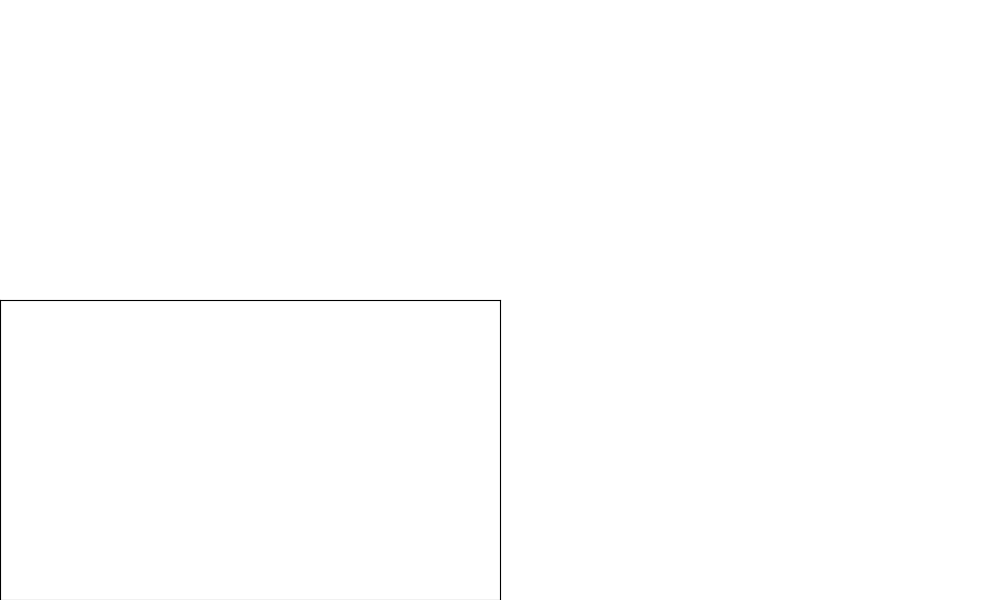

In [287]:

fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0., 0., 0.5, 0.5])
ax.hist(np.log10(results[1].data['bayes.stellar.m_star']), #bins=np.arange(7.25, 10, 0.25),
            edgecolor='black', facecolor='orangered')
ax.axvline(np.median(m_star), ls='--', lw=4, color='black', label='Median')
ax.axvline(8.9542, ls='--', lw=4, color='purple', label='Median Bian+2016')
ax.legend(frameon=True)
ax.set_xlabel(r'log(M / M$_{\odot}$)')
#plt.savefig('/home/benjamin/Documents/analogs/masses_jpg', bbox_inches='tight', facecolor='white')

Text(0.5, 0, 'best($M_{young}$) $\\times$ Age / best($M_{tot}$)')

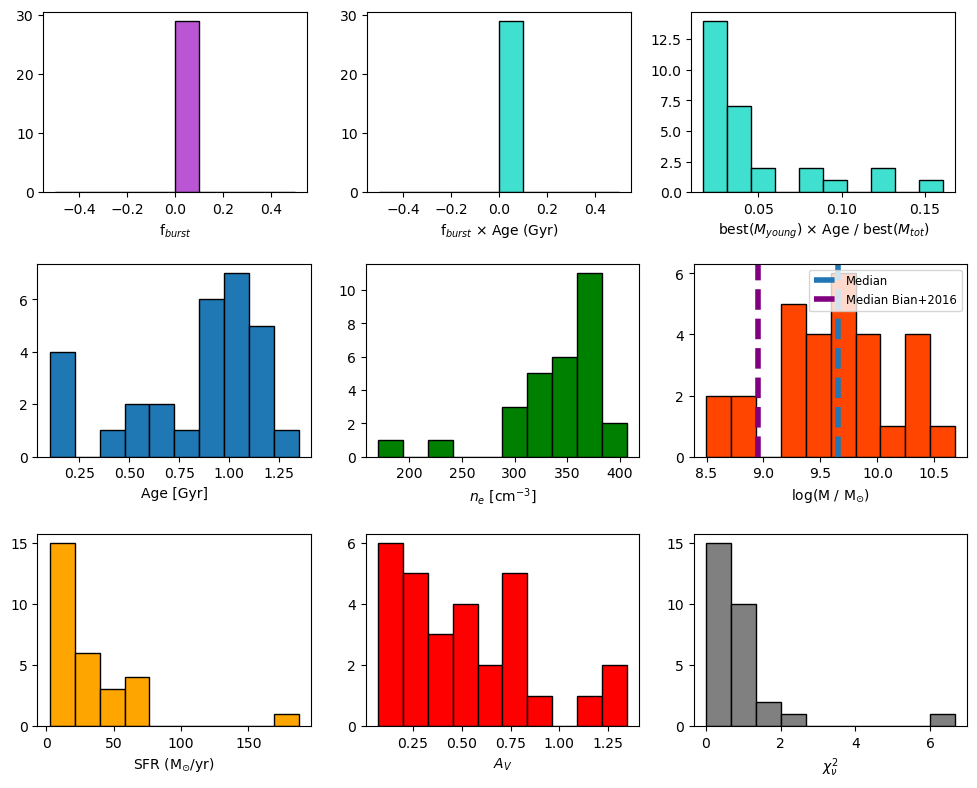

In [46]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches((12, 6))

# benjamin = results[1].data[:17]

benjamin = results[1].data 

plt.subplots_adjust(wspace=0.2, hspace=0.4)

axs[0, 0].hist(benjamin['bayes.sfh.age']/1000, #bins=np.arange(0, 8.5, 1),
         edgecolor='black')
axs[0, 0].set_xlabel('Age [Gyr]')

axs[0, 1].hist(benjamin['bayes.nebular.ne'], #bins=np.arange(200, 800, 80),
         edgecolor='black', facecolor='green')
axs[0, 1].set_xlabel(r'$n_{e}$ [cm$^{-3}$]')

axs[0, 2].hist(np.log10(benjamin['bayes.stellar.m_star']), #bins=np.arange(7.25, 10, 0.25),
            edgecolor='black', facecolor='orangered')
axs[0, 2].axvline(np.median(np.log10(benjamin['bayes.stellar.m_star'])), ls='--', lw=4, label='Median')
axs[0, 2].axvline(8.9542, ls='--', lw=4, color='purple', label='Median Bian+2016')
axs[0, 2].legend(fontsize='small')
axs[0, 2].set_xlabel(r'log(M / M$_{\odot}$)')

axs[1, 0].hist(benjamin['bayes.sfh.sfr100Myrs'], #bins=np.arange(0, 20, 2),
         edgecolor='black', facecolor='orange')
axs[1, 0].set_xlabel(r'SFR (M$_{\odot}$/yr)')

axs[1, 1].hist(3.1 * benjamin['bayes.attenuation.E_BVs'], #bins=np.arange(0.05, 0.4, 0.05),
               edgecolor='black', facecolor='red')
axs[1, 1].set_xlabel(r'$A_{V}$')

axs[1, 2].hist(benjamin['best.reduced_chi_square'],
              edgecolor='black', facecolor='gray')
axs[1, 2].set_xlabel(r'$\chi^{2}_{\nu}$')

ax_extra = fig.add_axes([0.13, 1, 0.22, 0.3])
ax_extra.hist(benjamin['bayes.sfh.f_burst'],
             edgecolor='black', facecolor='mediumorchid')
ax_extra.set_xlabel(r'f$_{burst}$')

ax_extra1 = fig.add_axes([0.40, 1, 0.22, 0.3])
ax_extra1.hist(benjamin['bayes.sfh.f_burst'] * benjamin['bayes.sfh.age']/1000,
             edgecolor='black', facecolor='turquoise')
ax_extra1.set_xlabel(r'f$_{burst}$ $\times$ Age (Gyr)')

ax_extra2 = fig.add_axes([0.67, 1, 0.22, 0.3])
ax_extra2.hist(benjamin['best.stellar.m_star_young'] * (benjamin['bayes.sfh.age']/1000) / benjamin['bayes.stellar.m_star'],
             edgecolor='black', facecolor='turquoise')
ax_extra2.set_xlabel(r'best($M_{young}$) $\times$ Age / best($M_{tot}$)')

#plt.savefig('/home/benjamin/Documents/analogs/results/sed_fitting/old_pop_late_burst/old_pop_late_burst_hist.jpg', bbox_inches='tight');

In [55]:
new = results[1].data[18:]
new['bayes.sfh.age']

array([3162.03294931, 2713.23683279, 3474.64858804, 2324.75153728,
       2322.38404162, 3565.57024314, 2101.29081508, 5838.08719074,
       2380.00675964], dtype='>f8')

Text(0.5, 0, 'best($M_{young}$) $\\times$ Age / best($M_{tot}$)')

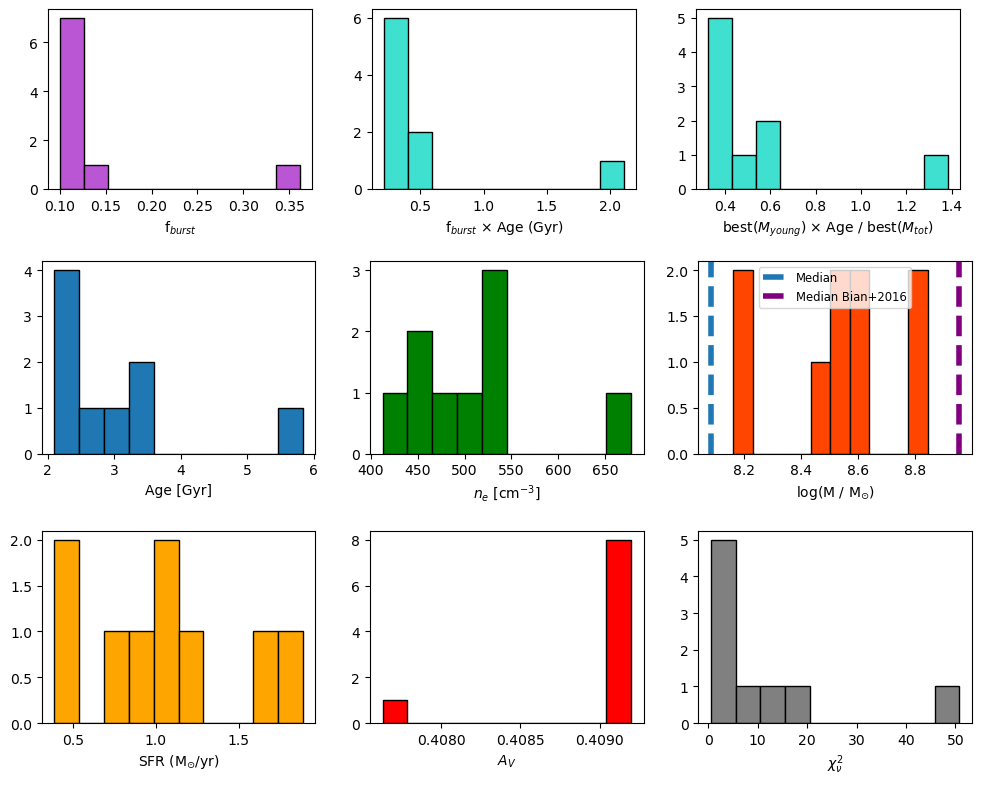

In [56]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches((12, 6))

new = results[1].data[18:]

plt.subplots_adjust(wspace=0.2, hspace=0.4)

axs[0, 0].hist(new['bayes.sfh.age']/1000, #bins=np.arange(0, 8.5, 1),
         edgecolor='black')
axs[0, 0].set_xlabel('Age [Gyr]')

axs[0, 1].hist(new['bayes.nebular.ne'], #bins=np.arange(200, 800, 80),
         edgecolor='black', facecolor='green')
axs[0, 1].set_xlabel(r'$n_{e}$ [cm$^{-3}$]')

axs[0, 2].hist(np.log10(new['bayes.stellar.m_star']), #bins=np.arange(7.25, 10, 0.25),
            edgecolor='black', facecolor='orangered')
axs[0, 2].axvline(np.median(m_star), ls='--', lw=4, label='Median')
axs[0, 2].axvline(8.9542, ls='--', lw=4, color='purple', label='Median Bian+2016')
axs[0, 2].legend(fontsize='small')
axs[0, 2].set_xlabel(r'log(M / M$_{\odot}$)')

axs[1, 0].hist(new['bayes.sfh.sfr100Myrs'], #bins=np.arange(0, 20, 2),
         edgecolor='black', facecolor='orange')
axs[1, 0].set_xlabel(r'SFR (M$_{\odot}$/yr)')

axs[1, 1].hist(3.1 * new['bayes.attenuation.E_BVs'], #bins=np.arange(0.05, 0.4, 0.05),
               edgecolor='black', facecolor='red')
axs[1, 1].set_xlabel(r'$A_{V}$')

axs[1, 2].hist(new['best.reduced_chi_square'],
              edgecolor='black', facecolor='gray')
axs[1, 2].set_xlabel(r'$\chi^{2}_{\nu}$')

ax_extra = fig.add_axes([0.13, 1, 0.22, 0.3])
ax_extra.hist(new['bayes.sfh.f_burst'],
             edgecolor='black', facecolor='mediumorchid')
ax_extra.set_xlabel(r'f$_{burst}$')

ax_extra1 = fig.add_axes([0.40, 1, 0.22, 0.3])
ax_extra1.hist(new['bayes.sfh.f_burst'] * new['bayes.sfh.age']/1000,
             edgecolor='black', facecolor='turquoise')
ax_extra1.set_xlabel(r'f$_{burst}$ $\times$ Age (Gyr)')

ax_extra2 = fig.add_axes([0.67, 1, 0.22, 0.3])
ax_extra2.hist(new['best.stellar.m_star_young'] * (new['bayes.sfh.age']/1000) / new['bayes.stellar.m_star'],
             edgecolor='black', facecolor='turquoise')
ax_extra2.set_xlabel(r'best($M_{young}$) $\times$ Age / best($M_{tot}$)')

#plt.savefig('/home/benjamin/Documents/analogs/results/sed_fitting/old_pop_late_burst/old_pop_late_burst_hist.jpg', bbox_inches='tight');

In [16]:
dust_cal = pd.read_csv(homedir + 'nava_data/analogs/results/old_results/dust_norm_cal_lines.csv')

In [59]:

E_BV_SED = []
E_BV_cal = []
for ID in ids:
    galid = ID[0:5]
    E_BV_SED.append(results[1].data['bayes.attenuation.E_BVs'][np.argmax(results[1].data['id'] == ID)] / 0.44)
    E_BV_cal.append(dust_cal['E_BV'][np.argmax(dust_cal['galname'] == galid)])
    

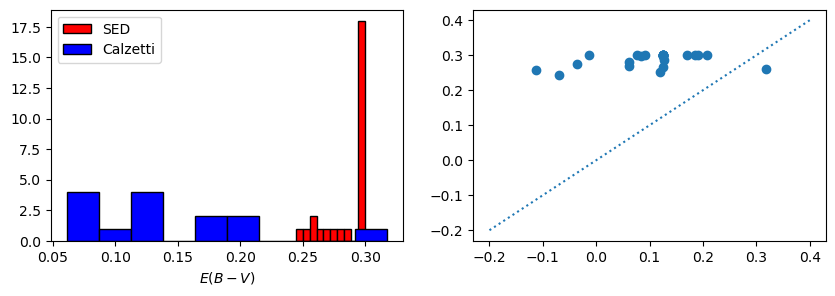

In [60]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches((10, 3))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

axs[0].hist(results[1].data['bayes.attenuation.E_BVs']/0.44,
               edgecolor='black', facecolor='red', label='SED')
axs[0].hist(dust_cal['E_BV'][dust_cal['E_BV'] > 0],
               edgecolor='black', facecolor='blue', label='Calzetti')
axs[0].set_xlabel(r'$E(B-V)$')
axs[0].legend()

axs[1].scatter(E_BV_cal, E_BV_SED)
axs[1].plot(np.arange(-0.2, 0.4, 0.01), np.arange(-0.2, 0.4, 0.01), ls=':')

Text(0.5, 0, 'log(M / M$_{\\odot}$) (CIGALE)')

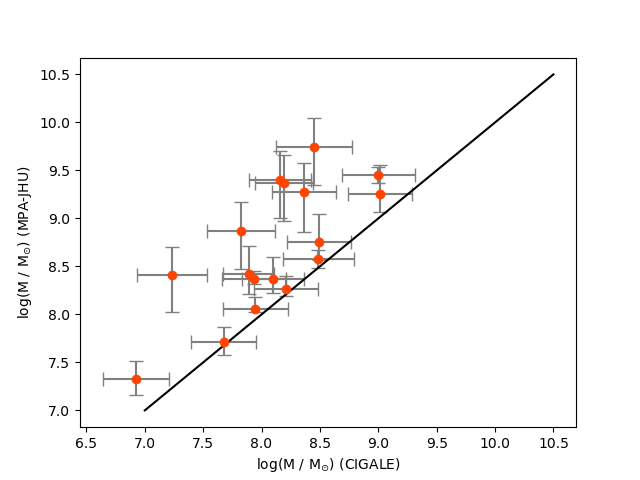

In [288]:
unc_m_star = unumpy.uarray(res_mage_del[1].data['bayes.stellar.m_star'][:17], res_mage_del[1].data['bayes.stellar.m_star_err'][:17])
m_star = unumpy.nominal_values(unumpy.log10(unc_m_star))
m_star_err = unumpy.std_devs(unumpy.log10(unc_m_star))

plt.figure()
plt.errorbar(m_star, mpa_jhu_m, xerr=m_star_err, yerr=asymmetric_error,
                   fmt='o', capsize=5, color='orangered', ecolor='gray')
plt.plot([7, 10.5], [7, 10.5], color='black')
plt.ylabel(r'log(M / M$_{\odot}$) (MPA-JHU)')
plt.xlabel(r'log(M / M$_{\odot}$) (CIGALE)')

#plt.savefig('/home/benjamin/Documents/analogs/results/sed_fitting/old_pop_late_burst/old_pop_late_burst_mass.pdf', bbox_inches='tight');

In [23]:
unc_m_star2 = unumpy.uarray(result2[1].data['bayes.stellar.m_star'], results[1].data['bayes.stellar.m_star_err'])
m_star2 = unumpy.nominal_values(unumpy.log10(unc_m_star2))
m_star2_err = unumpy.std_devs(unumpy.log10(unc_m_star2))

NameError: name 'result2' is not defined

In [24]:
unc_m_star3 = unumpy.uarray(results3[1].data['bayes.stellar.m_star'], results3[1].data['bayes.stellar.m_star_err'])
m_star3 = unumpy.nominal_values(unumpy.log10(unc_m_star3))
m_star3_err = unumpy.std_devs(unumpy.log10(unc_m_star3))

NameError: name 'results3' is not defined

NameError: name 'm_star2' is not defined

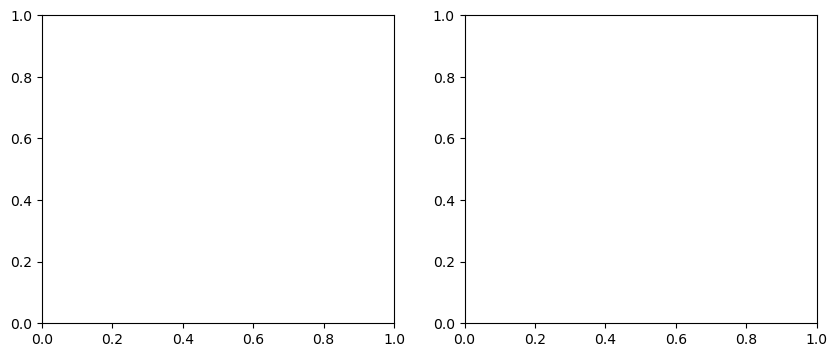

In [25]:
fig, (ax, ax1) = plt.subplots(1, 2)
fig.set_size_inches(10, 4)
ax.errorbar(m_star, m_star2, xerr=m_star_err, yerr=m_star2_err,
                   fmt='o', capsize=5, color='turquoise', ecolor='gray')
ax.plot([6.5, 9.5], [6.5, 9.5], color='black')
ax.set_ylabel(r'log(M / M$_{\odot}$) (Constant SFH with age < 1 Gyr)')
ax.set_xlabel(r'log(M / M$_{\odot}$) (Old population + late burst)')

ax1.errorbar(m_star, m_star3, xerr=m_star_err, yerr=m_star3_err,
                   fmt='o', capsize=5, color='turquoise', ecolor='gray')
ax1.plot([6.5, 9.5], [6.5, 9.5], color='black')
ax1.set_ylabel(r'log(M / M$_{\odot}$) (Constant SFH)')
ax1.set_xlabel(r'log(M / M$_{\odot}$) (Old population + late burst)')
#plt.savefig('/home/benjamin/Documents/analogs/results/mass_comparison.png', bbox_inches='tight')

In [26]:
mask = results[1].data['id'] == 'J0023-0948'

flux_model_mJy = []
flux_obs_mJy = []

flux_model = []
flux_obs = []

filts = ['u', 'g', 'r', 'i', 'z']
center = np.array([0.356505, 0.470033, 0.617448, 0.753363, 0.878169]) * 10000 # wavelength in angstrom

input_data = ascii.read(homedir + 'sed_fitting/cigale_mage_input.txt')
age = ufloat(results[1].data['bayes.sfh.age'][mask][0], results[1].data['bayes.sfh.age_err'][mask][0]) / 1000
mass = unumpy.log10(ufloat(results[1].data['bayes.stellar.m_star'][mask][0], results[1].data['bayes.stellar.m_star_err'][mask][0]))
att = 3.1 * ufloat(results[1].data['bayes.attenuation.E_BVs'][mask][0], results[1].data['bayes.attenuation.E_BVs_err'][mask][0])
sfr = ufloat(results[1].data['bayes.sfh.sfr'][mask][0], results[1].data['bayes.sfh.sfr_err'][mask][0])
red_chi2 = round(results[1].data['best.reduced_chi_square'][mask][0], 2)
for i in range(len(filts)):
    fl_model_mJy = results[1].data['bayes.'+filts[i]+'_prime'][mask][0]
    flux_model_mJy.append(fl_model_mJy)
    fl_obs_mJy = input_data[filts[i]+'_prime'][mask]
    flux_obs_mJy.append(fl_obs_mJy)
    flux_model.append(1e-18 * fl_model_mJy * 299792458 * 100 / (center[i]**2))
    flux_obs.append(1e-18 * float(fl_obs_mJy) * 299792458 * 100 / (center[i]**2))

/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_3446/1417863952.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flux_obs.append(1e-18 * float(fl_obs_mJy) * 299792458 * 100 / (center[i]**2))


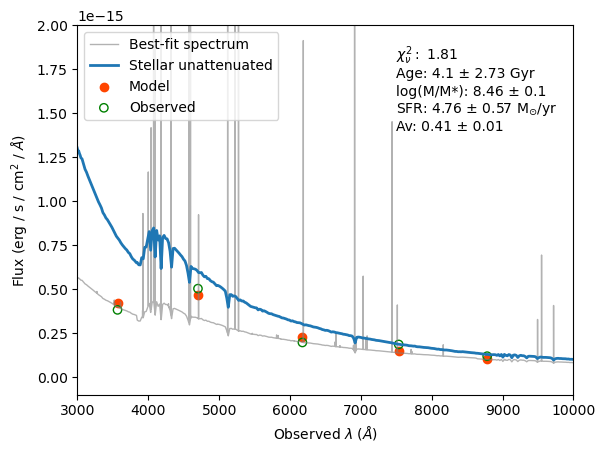

In [27]:
J0023 = fits.open(homedir + 'sed_fitting/out/J0023-0948_best_model.fits')

plt.plot(J0023[1].data['wavelength']*10,
         J0023[1].data['L_lambda_total'] * 1e6 / (4 * np.pi * (7.33157e26**2)),
         color='gray', alpha=0.6, lw=1, label='Best-fit spectrum'
)
plt.plot(J0023[1].data['wavelength']*10,
         (J0023[1].data['stellar.young']+J0023[1].data['stellar.old']) * 1e6 / (4 * np.pi * (7.33157e26**2)),
         lw=2, label='Stellar unattenuated'
)

plt.text(7500, 1.8e-15, r'$\chi^{2}_{\nu}:$ '+str(red_chi2))
plt.text(7500, 1.7e-15, 'Age: '+ str(round(age.nominal_value, 2)) + ' ± ' + str(round(age.std_dev, 2)) +' Gyr')
plt.text(7500, 1.6e-15, 'log(M/M*): '+str(round(float(unumpy.nominal_values(mass)), 2)) + ' ± ' + str(round(float(unumpy.std_devs(mass)), 2)))
plt.text(7500, 1.5e-15, 'SFR: '+ str(round(sfr.nominal_value, 2)) + ' ± ' + str(round(sfr.std_dev, 2)) + r' M$_{\odot}$/yr')
plt.text(7500, 1.4e-15, 'Av: '+ str(round(att.nominal_value, 2)) + ' ± ' + str(round(att.std_dev, 2)))
plt.ylabel('Flux (erg / s / cm$^{2}$ / $\AA$)')

plt.xlabel('Observed $\lambda$ ($\AA$)')
plt.scatter(center, flux_model, color='orangered', label='Model')
plt.scatter(center, flux_obs, color='green', facecolor='none', label='Observed')
plt.ylim(-0.1e-15, 2e-15)
plt.xlim(3000, 10000)
plt.legend(loc='upper left')

#plt.plot(J0023_spec['wave'], J0023_spec['flux'])

---

# SED fitting results spectrum

In [28]:
# Cosmology frame to calculate luminosity distances
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)

# To read images
from PIL import Image

# Read this galaxy data
gal = 'J0021'
galaxy_id = input_data['id'][0]
z_galaxy = input_data['redshift'][0]

# SDSS wavelengths and filters
center = np.array([0.356505, 0.470033, 0.617448, 0.753363, 0.878169]) * 10000 # wavelength in angstrom
filts = ['u', 'g', 'r', 'i', 'z']

In [29]:
# Reading galaxy model result from CIGALE fit
gal_model = fits.open(homedir+'sed_fitting/out/'+galaxy_id+'_best_model.fits')

# Luminosity distance
lum_distance = cosmo.luminosity_distance(z_galaxy) * \
                        (1 * u.cm / (3.24078e-25 * u.Mpc))

# Stellar emission
stellar = (gal_model[1].data['stellar.young'] + gal_model[1].data['stellar.old'] \
         + gal_model[1].data['attenuation.stellar.young'] \
         + gal_model[1].data['attenuation.stellar.old']) \
         * 1e6 / (4 * np.pi * (lum_distance**2)) * 1e18 \
         * (gal_model[1].data['wavelength']*10)**2 / 299792458 / 100

# Extract photometric data and models
mask = (results[1].data['id'] == galaxy_id)

flux_model_mJy = []
flux_obs_mJy = []

flux_model = []
flux_obs = []

# Age in Gyr
age = ufloat(results[1].data['bayes.sfh.age'][mask][0],
             results[1].data['bayes.sfh.age_err'][mask][0]) / 1000

# Stellar mass
mass = unumpy.log10(ufloat(results[1].data['bayes.stellar.m_star'][mask][0],
                           results[1].data['bayes.stellar.m_star_err'][mask][0]))

# Av extinction
att = 3.1 * ufloat(results[1].data['bayes.attenuation.E_BVs'][mask][0],
                   results[1].data['bayes.attenuation.E_BVs_err'][mask][0])

# Star-formation rate
sfr = ufloat(results[1].data['bayes.sfh.sfr'][mask][0],
             results[1].data['bayes.sfh.sfr_err'][mask][0])

# Reduced Xi squared
red_chi2 = round(results[1].data['best.reduced_chi_square'][mask][0], 2)

# Saving the info in array form
for i in range(len(filts)):
    fl_model_mJy = results[1].data['bayes.'+filts[i]+'_prime'][mask][0]
    flux_model_mJy.append(fl_model_mJy)
    fl_obs_mJy = input_data[filts[i]+'_prime'][mask]
    flux_obs_mJy.append(fl_obs_mJy)
    flux_model.append(1e-18 * fl_model_mJy * 299792458 * 100 / (center[i]**2))
    flux_obs.append(1e-18 * float(fl_obs_mJy) * 299792458 * 100 / (center[i]**2))

/var/folders/b3/z1vmt1t542ncmpppx7tfrqd80000gn/T/ipykernel_3446/3589844853.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  flux_obs.append(1e-18 * float(fl_obs_mJy) * 299792458 * 100 / (center[i]**2))


Text(0.5, 0, 'Observed $\\lambda$ (\\AA)')

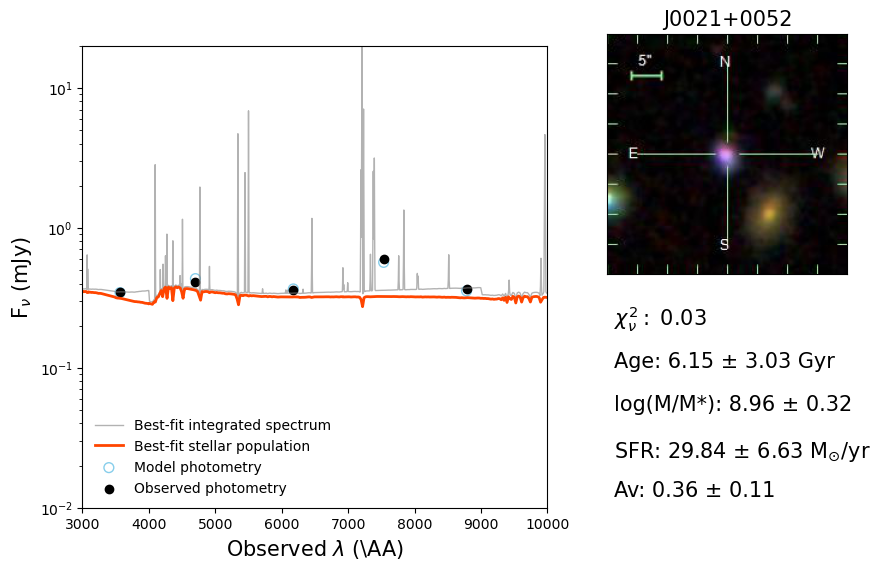

In [30]:
# texPlot('on')

fig, main_ax = plt.subplots()
fig.set_size_inches((6,6))

# Plot Best-fit Spectrum
main_ax.plot(gal_model[1].data['wavelength']*10, gal_model[1].data['Fnu'],
        color='gray', alpha=0.6, lw=1, label='Best-fit integrated spectrum')

# Plot Best-fit stellar component
main_ax.plot(gal_model[1].data['wavelength']*10, stellar,
         lw=2, label='Best-fit stellar population', color='orangered')

# Photometry
main_ax.scatter(center, flux_model_mJy, facecolor='none', color='skyblue', s=50, label='Model photometry')
main_ax.scatter(center, flux_obs_mJy, color='black', label='Observed photometry')

# Add SDSS stamp
img_stamp = Image.open(homedir + 'nava_data/analogs/imges/sdss_stamps/J0021.jpeg')

right_inset_ax = fig.add_axes([1.0, .5, .4, .4], facecolor='w')
right_inset_ax.tick_params(
    axis='both',       # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    left=False,         # ticks along the top edge are off
    labelbottom=False,  # labels along the bottom edge are off
    labelleft=False     # labels along the top edge are off
    
)
right_inset_ax.imshow(img_stamp)

# SED fit results
main_ax.text(11000, 2e-1, r'$\chi^{2}_{\nu}:$ '+str(red_chi2), fontsize=15)
main_ax.text(11000, 1e-1, 'Age: '+ str(round(age.nominal_value, 2)) + ' ± ' + str(round(age.std_dev, 2)) +' Gyr', fontsize=15)
main_ax.text(11000, 5e-2, 'log(M/M*): '+str(round(float(unumpy.nominal_values(mass)), 2)) + ' ± ' + str(round(float(unumpy.std_devs(mass)), 2)), fontsize=15)
main_ax.text(11000, 2.3e-2, 'SFR: '+ str(round(sfr.nominal_value, 2)) + ' ± ' + str(round(sfr.std_dev, 2)) + r' M$_{\odot}$/yr', fontsize=15)
main_ax.text(11000, 1.2e-2, 'Av: '+ str(round(att.nominal_value, 2)) + ' ± ' + str(round(att.std_dev, 2)), fontsize=15)

# To rotulate well
main_ax.set_xlim(3000, 10000)
main_ax.set_ylim(1e-2, 20)

main_ax.set_yscale('log')
main_ax.legend(loc='lower left', frameon=False, edgecolor='black')
right_inset_ax.set_title(galaxy_id, fontsize=15)
main_ax.set_ylabel(r'F$_{\nu}$ (mJy)', fontsize=15)
main_ax.set_xlabel(r'Observed $\lambda$ (\AA)', fontsize=15)
#fig.savefig(magePath+'imges/sed_fitting/'+galaxy_id+'_example_noage.pdf', bbox_inches='tight')

---

(3000.0, 10000.0)

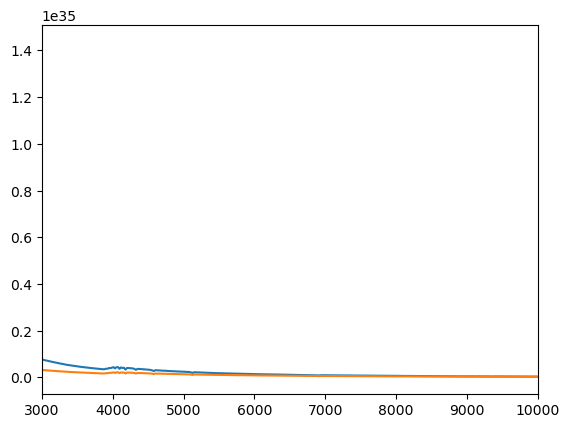

In [31]:
#plt.plot(J0023[1].data['wavelength']*10, J0023[1].data['attenuation.stellar.young'])
#plt.plot(J0023[1].data['wavelength']*10, J0023[1].data['attenuation.stellar.old'])
plt.plot(J0023[1].data['wavelength']*10, J0023[1].data['stellar.young'])
plt.plot(J0023[1].data['wavelength']*10, J0023[1].data['stellar.young'] + J0023[1].data['attenuation.stellar.young'])
#plt.plot(J0023[1].data['wavelength']*10, J0023[1].data['stellar.old'])
plt.xlim(3000, 10000)
#plt.ylim(-0.3e34, 0)

# Balmer absorption

In [36]:
J0023_best_model = fits.open(homedir + 'sed_fitting/out/J0023-0948_best_model.fits')

from magE.functions import gaussian


ModuleNotFoundError: No module named 'magE'

TypeError: gaussian() takes 4 positional arguments but 5 were given

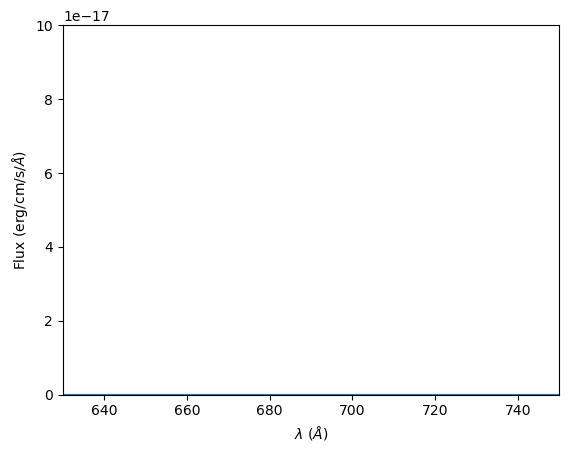

In [53]:
plt.plot(J0023[1].data['wavelength'], J0023[1].data['stellar.young'] / (4 * np.pi * (7.33157e26**2)))
#plt.plot(J0023_best_model[1].data['wavelength'], J0023_best_model[1].data['stellar.old'] / (4 * np.pi * (7.33157e26**2)))
plt.xlabel(r'$\lambda$ ($\AA$)')
plt.ylabel(r'Flux (erg/cm/s/$\AA$)')
plt.xlim(630, 750)
plt.ylim(0, 1e-16)
plt.plot(J0023[1].data['wavelength'], (-0.45e-17/35)*J0023[1].data['wavelength'] + 1.25e-16 + gaussian(J0023[1].data['wavelength']*10, -1.1e-16, 6562.3, 0.054, 10))
#plt.plot(J0023_best_model[1].data['wavelength'], (-0.45e-17/35)*J0023_best_model[1].data['wavelength'] + 1.25e-16, ls='--')
#plt.yscale('log')
#plt.xscale('log')

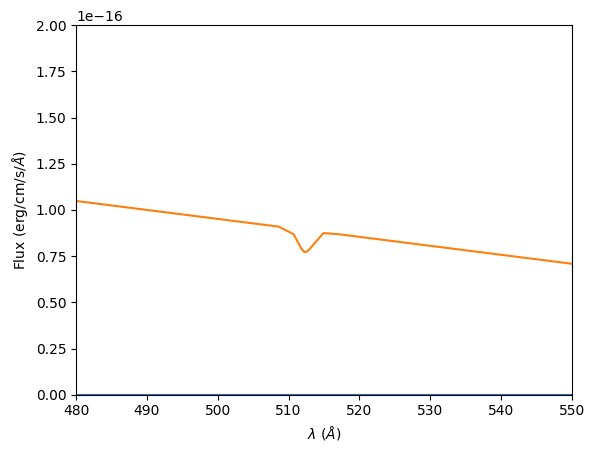

In [14]:
plt.plot(J0023_best_model[1].data['wavelength'],
         J0023_best_model[1].data['stellar.young'] / (4 * np.pi * (7.33157e26**2)))
#plt.plot(J0023_best_model[1].data['wavelength'], J0023_best_model[1].data['stellar.old'] / (4 * np.pi * (7.33157e26**2)))
plt.xlabel(r'$\lambda$ ($\AA$)')
plt.ylabel(r'Flux (erg/cm/s/$\AA$)')
plt.xlim(480, 550)
plt.ylim(0, 2e-16)
plt.plot(J0023_best_model[1].data['wavelength'],
         (-1.7e-17/35)*J0023_best_model[1].data['wavelength'] + 3.38e-16 \
         + gaussian(J0023_best_model[1].data['wavelength']*10, -3e-16, 4861, 0.054, 10))
#plt.plot(J0023_best_model[1].data['wavelength'], (-1.7e-17/35)*J0023_best_model[1].data['wavelength'] + 3.38e-16, ls='--')
#plt.yscale('log')
#plt.xscale('log')